<a href="https://colab.research.google.com/github/tarun-jethwani/DataAnalysesNotebooks/blob/master/stock_market_analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [0]:
! pip install datetime

     |████████████████████████████████| 61kB 2.0MB/s 
     |████████████████████████████████| 174kB 8.3MB/s 


In [0]:
from datetime import datetime

from __future__ import division

In [0]:
! pip install pandas-datareader

In [0]:
!pip install pandas-datareader

In [0]:
from pandas_datareader.data import DataReader

In [0]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [0]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [0]:
for stock in tech_list:
  globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [0]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-11-06 to 2019-11-05
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


In [0]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-06,204.720001,201.690002,201.919998,203.770004,31882900.0,200.656265
2018-11-07,210.059998,204.130005,205.970001,209.949997,33424400.0,206.741821
2018-11-08,210.119995,206.750000,209.979996,208.490005,25362600.0,206.020493
2018-11-09,206.009995,202.250000,205.550003,204.470001,34365800.0,202.048096
2018-11-12,199.850006,193.789993,199.000000,194.169998,51135500.0,191.870087
...,...,...,...,...,...,...
2019-10-30,245.300003,241.210007,244.759995,243.259995,30950600.0,243.259995
2019-10-31,249.169998,237.259995,247.240005,248.759995,34766600.0,248.759995
2019-11-01,255.929993,249.160004,249.539993,255.820007,37738700.0,255.820007


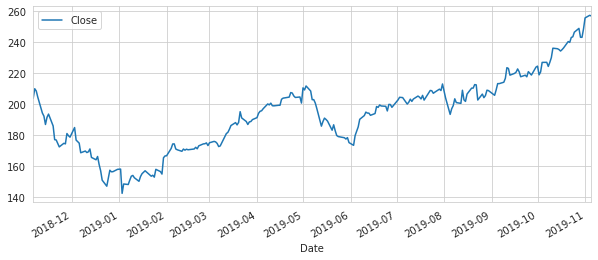

In [0]:
AAPL['Close'].plot(legend=True, figsize=(10, 4))

In [0]:
ma_day = [10, 20, 50]

for ma in ma_day:
  
  column_name = "MA for %s days" %(str(ma))
  
  AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()
  

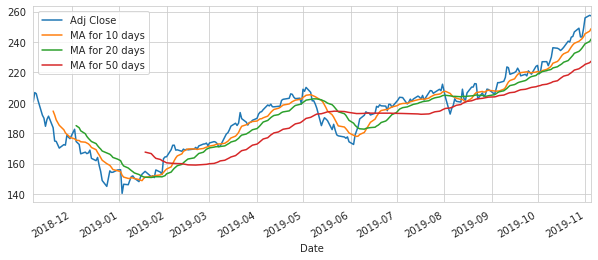

In [0]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))

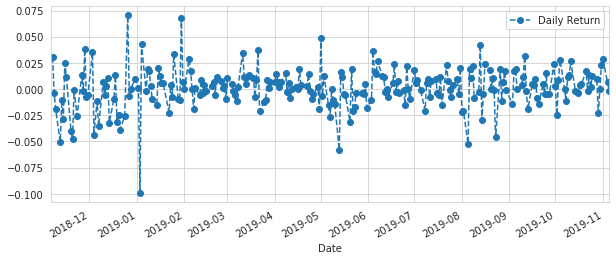

In [0]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

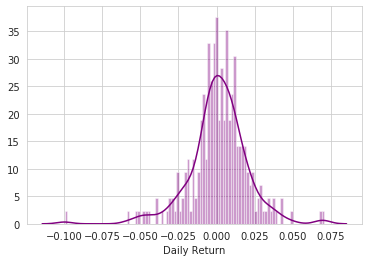

In [0]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

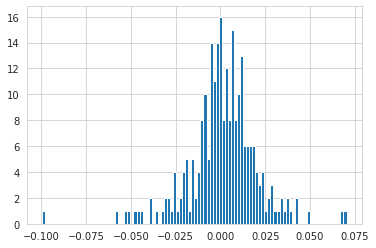

In [0]:
AAPL['Daily Return'].hist(bins=100)

In [0]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [0]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2018-11-06,200.656265,1055.810059,106.053505,1642.810059
2018-11-07,206.741821,1093.390015,110.227905,1755.489990
2018-11-08,206.020493,1082.400024,110.021149,1754.910034
2018-11-09,202.048096,1066.150024,107.874870,1712.430054
2018-11-12,191.870087,1038.630005,105.216652,1636.849976


In [0]:
tech_rets = closing_df.pct_change()

In [0]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2018-11-06,NaN,NaN,NaN,NaN
2018-11-07,0.030328,0.035593,0.039361,0.068590
2018-11-08,-0.003489,-0.010051,-0.001876,-0.000330
2018-11-09,-0.019282,-0.015013,-0.019508,-0.024206
2018-11-12,-0.050374,-0.025813,-0.024642,-0.044136


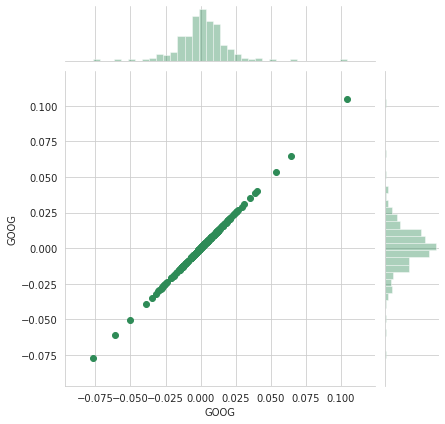

In [0]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

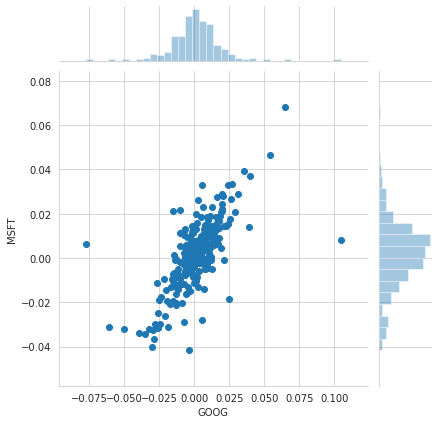

In [0]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

In [0]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2018-11-06,NaN,NaN,NaN,NaN
2018-11-07,0.030328,0.035593,0.039361,0.068590
2018-11-08,-0.003489,-0.010051,-0.001876,-0.000330
2018-11-09,-0.019282,-0.015013,-0.019508,-0.024206
2018-11-12,-0.050374,-0.025813,-0.024642,-0.044136


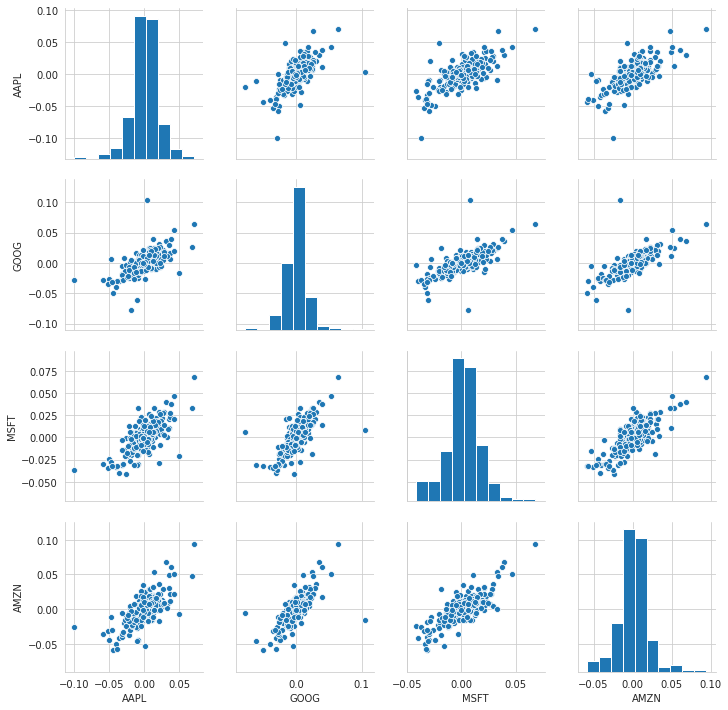

In [0]:
sns.pairplot(tech_rets.dropna())

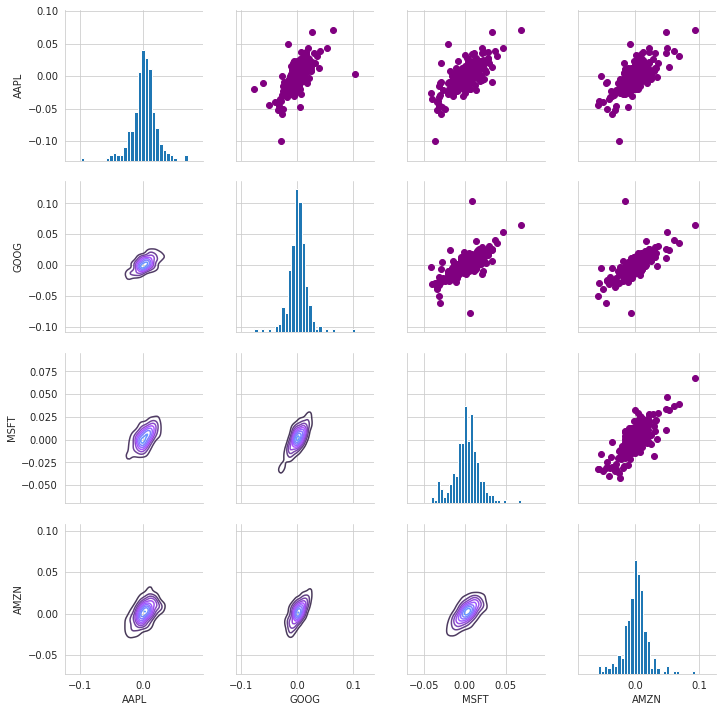

In [0]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

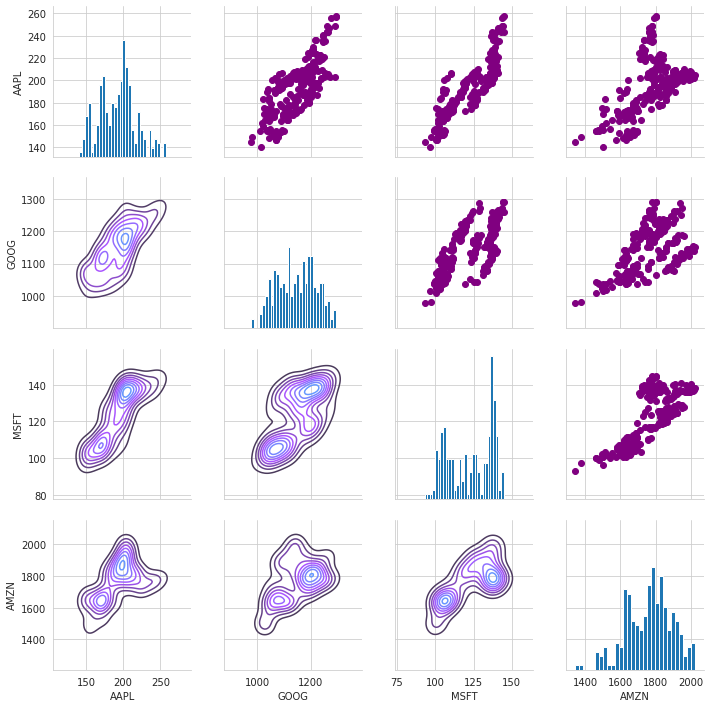

In [0]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

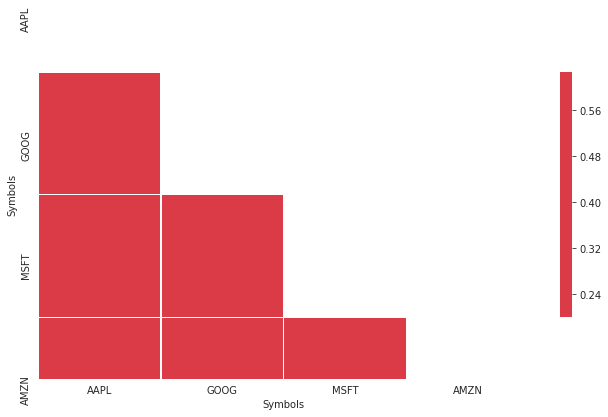

In [0]:
corr = tech_rets.dropna().corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.2, center=0,
           square=True, linewidth=.5, cbar_kws={"shrink": .5})

In [0]:
rets = tech_rets.dropna()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  


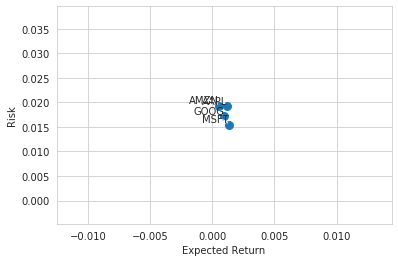

In [0]:
area = np.pi *  20

plt.scatter(rets.mean(), rets.std(), s = area)

plt.xlabel("Expected Return")

plt.ylabel('Risk')

for label, x,y in  zip(rets.columns, rets.mean(), rets.std()):
  plt.annotate(
      label,
      xy = (x,y), 
      textcoords = 'offset points', ha= 'right', va = 'bottom',
      arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad=-0.3'))
  

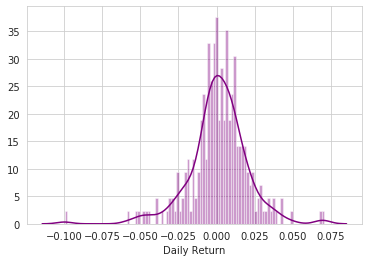

In [0]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color='purple')

In [0]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2018-11-07,0.030328,0.035593,0.039361,0.068590
2018-11-08,-0.003489,-0.010051,-0.001876,-0.000330
2018-11-09,-0.019282,-0.015013,-0.019508,-0.024206
2018-11-12,-0.050374,-0.025813,-0.024642,-0.044136
2018-11-13,-0.009991,-0.002484,0.000655,-0.003470


In [0]:
rets['AAPL'].quantile(0.05)

-0.030549662918626604

Estimate of pi: 3.1426


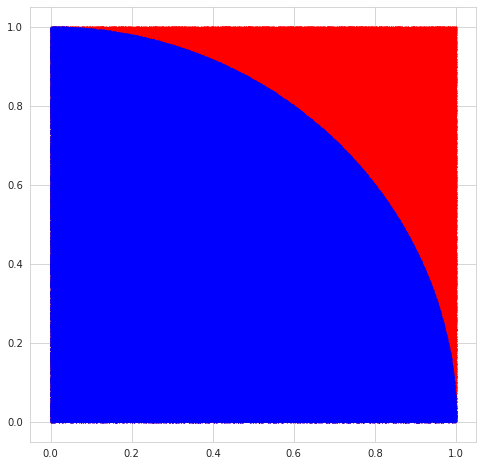

In [0]:
import numpy as np
import matplotlib.pyplot as plt
n = 1000000
x = np.random.rand(n,2)
inside = x[np.sqrt(x[:, 0]**2 + x[:, 1]**2) < 1]
estimate = 4*len(inside)/len(x)
print('Estimate of pi: {}'.format(estimate))
plt.figure(figsize=(8,8))
plt.scatter(x[:, 0], x[:, 1], s= .5, c='red')
plt.scatter(inside[:,0], inside[:, 1], s=.5, c='blue')
plt.show()

In [0]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [0]:
def stock_monte_carlo(start_price, days, mu, sigma):

  price = np.zeros(days)
  price[0] = start_price

  shock = np.zeros(days)
  drift = np.zeros(days)

  for i in range(1, days):

    shock[i] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))

    drift[i] = mu * dt

    price[i] = price[i-1] + (price[i-1] * (drift[i] + shock[i]))
  
  return price

Text(0.5, 1.0, 'Monte Carlo Analyeses for Google')

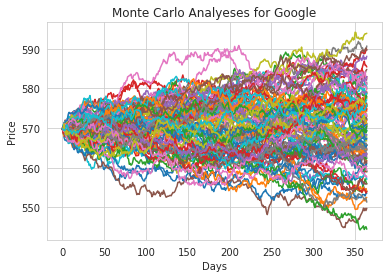

In [0]:
start_price = 569.85

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analyeses for Google")

In [0]:
runs = 10000

simulations = np.zeros(runs)

np.set_printoptions(threshold=5)

for run in  range(runs):

    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]
    

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

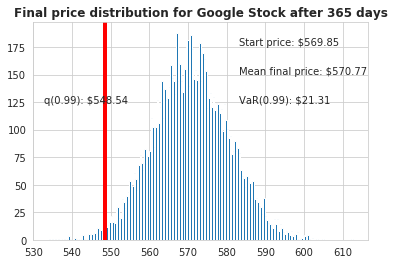

In [0]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')

